In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import cv2

from data.scannet.utils import ScanNetDataset
from utils.optical_flow_numpy import optical_flow

import torch
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
i = np.load('/home/project/ScanNet/intrinsics_test.npz')

In [10]:
i['scene0707_00']

array([575.66571 ,   0.      , 320.287018,   0.      , 578.05188 ,
       240.126617,   0.      ,   0.      ,   1.      ])

### Check

In [4]:
test_data = ScanNetDataset(
    root_dir='/home/project/ScanNet/scannet_test_1500/',
    npz_path='/home/project/ScanNet/test.npz',
    intrinsics_path='/home/project/ScanNet/intrinsics_test.npz',
    mode='test'
)

In [5]:
data = test_data[0]

In [80]:
flow, mask = optical_flow(data['depth0'].numpy(), data['T_0'].numpy(), data['T_1'].numpy(), data['K0'].numpy(), data['K1'].numpy(),
             mask = True, normalize=False)

0.0


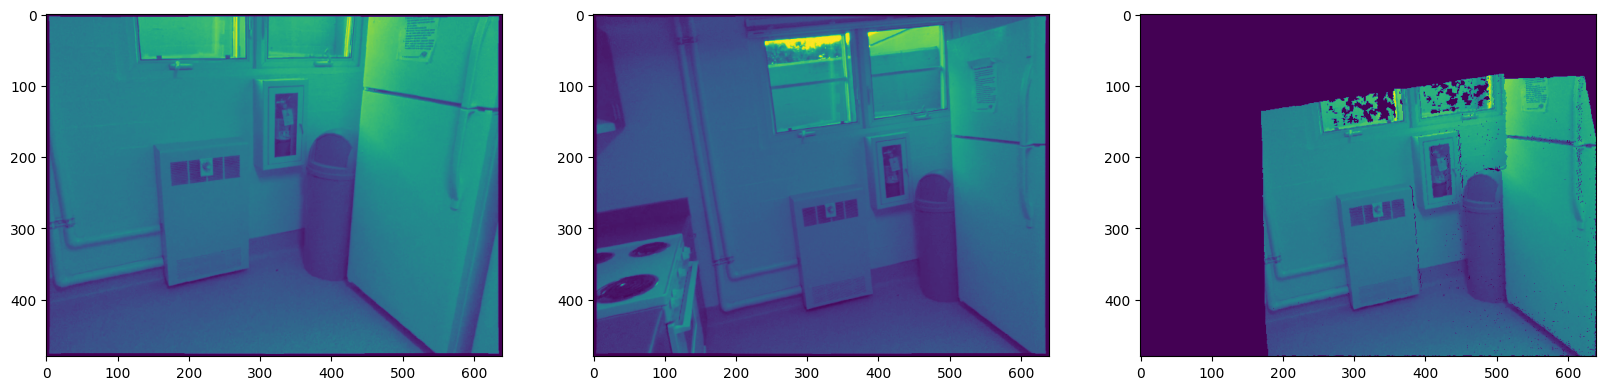

In [114]:
w, h = np.meshgrid(np.arange(640), np.arange(480))
coo_0 = np.concatenate([w[None, :, :], h[None, :, :]])

uv_0 = coo_0.reshape(2, -1)
uv_01 = ((coo_0 + flow) * mask).reshape(2, -1).round().astype('int')

projection = np.zeros((480, 640))
projection[uv_01[1, :], uv_01[0, :]] = data['image0'][:, uv_0[1, :], uv_0[0, :]]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(data['image0'].squeeze())
ax[1].imshow(data['image1'].squeeze())
ax[2].imshow(projection)